In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Python\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 

In [6]:
df = pd.read_csv("Cricket.csv", encoding='iso-8859-1')

In [7]:
df.head(3)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20


In [8]:
df.Span.str.split('-')[0] 

['1989', '2012']

In [9]:
df['span_yrs'] = df.Span.apply(lambda x: int(x.split('-')[1]) -int(x.split('-')[0] ))
df['span_yrs']

0     23
1     15
2     17
3     22
4     17
      ..
74    16
75    13
76    10
77    11
78    15
Name: span_yrs, Length: 79, dtype: int64

In [10]:
df['HS_int'] = df.HS.map(lambda x: x.split('*')[0])
df['HS_int'] = df.HS.map(lambda x: x.split('*')[0])

df['HS_int'] 

0     200
1     169
2     164
3     189
4     144
     ... 
74    133
75     96
76    120
77    156
78    112
Name: HS_int, Length: 79, dtype: object

In [11]:
# removing (statistical) outliers
Q1 = df.SR.quantile(0.05)
Q3 = df.SR.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.SR >= Q1 - 1.5*IQR) & (df.SR <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = df.Ave.quantile(0.05)
Q3 = df.Ave.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Ave >= Q1 - 1.5*IQR) & (df.Ave <= Q3 + 1.5*IQR)]
 


In [12]:
ss = StandardScaler()
df_scale =  df[[  'SR','Ave']]
df_ftrnsform = ss.fit_transform(df_scale)


In [13]:
merged  = linkage(df_ftrnsform , method = "complete"  , metric="euclidean")

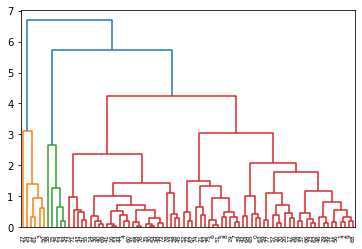

In [17]:
dendrogram(merged)
plt.show()

In [23]:
hc_labels =cut_tree(merged ,n_clusters=4).reshape(-1, )

In [24]:
df['hc_labels'] = hc_labels
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,span_yrs,HS_int,hc_labels
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23,200,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,169,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,164,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,189,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,144,2


In [28]:
df.loc[df['Player'].str.contains('Kohli')]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,span_yrs,HS_int,hc_labels
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,183,3


In [31]:
df['Player'].loc[df['hc_labels']==0].unique()

array(['SR Tendulkar\xa0(INDIA)', 'KC Sangakkara\xa0(Asia/ICC/SL)',
       'RT Ponting\xa0(AUS/ICC)', 'Inzamam-ul-Haq\xa0(Asia/PAK)',
       'JH Kallis\xa0(Afr/ICC/SA)', 'SC Ganguly\xa0(Asia/INDIA)',
       'R Dravid\xa0(Asia/ICC/INDIA)', 'BC Lara\xa0(ICC/WI)',
       'TM Dilshan\xa0(SL)', 'Mohammad Yousuf\xa0(Asia/PAK)',
       'CH Gayle\xa0(ICC/WI)', 'Saeed Anwar\xa0(PAK)',
       'S Chanderpaul\xa0(WI)', 'Yuvraj Singh\xa0(Asia/INDIA)',
       'DL Haynes\xa0(WI)', 'MS Atapattu\xa0(SL)', 'ME Waugh\xa0(AUS)',
       'HH Gibbs\xa0(SA)', 'MJ Clarke\xa0(AUS)', 'Javed Miandad\xa0(PAK)',
       'GC Smith\xa0(Afr/SA)', 'G Kirsten\xa0(SA)',
       'IVA Richards\xa0(WI)', 'LRPL Taylor\xa0(NZ)',
       'ML Hayden\xa0(AUS/ICC)', 'DM Jones\xa0(AUS)', 'DC Boon\xa0(AUS)',
       'RR Sarwan\xa0(WI)', 'EJG Morgan\xa0(ENG/IRE)',
       'SR Watson\xa0(AUS)', 'WJ Cronje\xa0(SA)', 'MJ Guptill\xa0(NZ)',
       'MEK Hussey\xa0(AUS)', 'RG Sharma\xa0(INDIA)', 'IR Bell\xa0(ENG)',
       'A Jadeja\xa0(INDIA)',

In [30]:
df['Player'].loc[df['hc_labels']==1].unique()

array(['ST Jayasuriya\xa0(Asia/SL)', 'AC Gilchrist\xa0(AUS/ICC)',
       'V Sehwag\xa0(Asia/ICC/INDIA)', 'Shahid Afridi\xa0(Asia/ICC/PAK)',
       'BB McCullum\xa0(NZ)', 'SK Raina\xa0(INDIA)'], dtype=object)

In [32]:
df['Player'].loc[df['hc_labels']==2].unique()

array(['DPMD Jayawardene\xa0(Asia/SL)', 'M Azharuddin\xa0(INDIA)',
       'PA de Silva\xa0(SL)', 'SP Fleming\xa0(ICC/NZ)',
       'SR Waugh\xa0(AUS)', 'A Ranatunga\xa0(SL)', 'Younis Khan\xa0(PAK)',
       'Saleem Malik\xa0(PAK)', 'NJ Astle\xa0(NZ)', 'A Flower\xa0(ZIM)',
       'Shoaib Malik\xa0(PAK)', 'GW Flower\xa0(ZIM)',
       'Ijaz Ahmed\xa0(PAK)', 'AR Border\xa0(AUS)',
       'RB Richardson\xa0(WI)', 'WU Tharanga\xa0(Asia/SL)',
       'JN Rhodes\xa0(SA)', 'Mohammad Hafeez\xa0(PAK)',
       'Rameez Raja\xa0(PAK)', 'CL Hooper\xa0(WI)',
       'Tamim Iqbal\xa0(BDESH)', 'BRM Taylor\xa0(ZIM)',
       'ADR Campbell\xa0(ZIM)', 'MN Samuels\xa0(WI)',
       'RS Mahanama\xa0(SL)', 'PD Collingwood\xa0(ENG)',
       'Abdul Razzaq\xa0(Asia/PAK)'], dtype=object)

In [33]:
df['Player'].loc[df['hc_labels']==3].unique()

array(['MS Dhoni\xa0(Asia/INDIA)', 'AB de Villiers\xa0(Afr/SA)',
       'V Kohli\xa0(INDIA)', 'HM Amla\xa0(SA)', 'MG Bevan\xa0(AUS)'],
      dtype=object)

In [38]:
kmeans.labels_

array([3, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 3, 1, 3, 1, 0, 2, 2, 0, 2,
       1, 2, 0, 3, 0, 0, 1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 3, 2, 1, 1, 3, 1,
       1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 3, 3, 2,
       2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1])

In [42]:
df['category'] = kmeans.labels_
df[['Player','SR','Ave','category']].sort_values('Ave' ,ascending=False)

,Player,SR,Ave,category
25,V Kohli (INDIA),90.99,53.94,3
38,MG Bevan (AUS),74.16,53.58,3
15,AB de Villiers (Afr/SA),100.25,53.55,3
13,MS Dhoni (Asia/INDIA),88.69,51.32,3
34,HM Amla (SA),89.05,50.25,3
...,...,...,...,...
71,ADR Campbell (ZIM),66.18,30.50,1
50,BB McCullum (NZ),96.37,30.41,0
78,Abdul Razzaq (Asia/PAK),81.25,29.70,1
73,RS Mahanama (SL),60.57,29.49,1


In [43]:
df['Player'].loc[df['category'] ==3].unique()

array(['SR Tendulkar\xa0(INDIA)', 'MS Dhoni\xa0(Asia/INDIA)',
       'AB de Villiers\xa0(Afr/SA)', 'V Kohli\xa0(INDIA)',
       'HM Amla\xa0(SA)', 'MG Bevan\xa0(AUS)', 'IVA Richards\xa0(WI)',
       'MJ Guptill\xa0(NZ)', 'MEK Hussey\xa0(AUS)'], dtype=object)

In [27]:
df['Player'].unique()

array(['SR Tendulkar\xa0(INDIA)', 'KC Sangakkara\xa0(Asia/ICC/SL)',
       'RT Ponting\xa0(AUS/ICC)', 'ST Jayasuriya\xa0(Asia/SL)',
       'DPMD Jayawardene\xa0(Asia/SL)', 'Inzamam-ul-Haq\xa0(Asia/PAK)',
       'JH Kallis\xa0(Afr/ICC/SA)', 'SC Ganguly\xa0(Asia/INDIA)',
       'R Dravid\xa0(Asia/ICC/INDIA)', 'BC Lara\xa0(ICC/WI)',
       'TM Dilshan\xa0(SL)', 'Mohammad Yousuf\xa0(Asia/PAK)',
       'AC Gilchrist\xa0(AUS/ICC)', 'MS Dhoni\xa0(Asia/INDIA)',
       'M Azharuddin\xa0(INDIA)', 'AB de Villiers\xa0(Afr/SA)',
       'PA de Silva\xa0(SL)', 'CH Gayle\xa0(ICC/WI)',
       'Saeed Anwar\xa0(PAK)', 'S Chanderpaul\xa0(WI)',
       'Yuvraj Singh\xa0(Asia/INDIA)', 'DL Haynes\xa0(WI)',
       'MS Atapattu\xa0(SL)', 'ME Waugh\xa0(AUS)',
       'V Sehwag\xa0(Asia/ICC/INDIA)', 'V Kohli\xa0(INDIA)',
       'HH Gibbs\xa0(SA)', 'Shahid Afridi\xa0(Asia/ICC/PAK)',
       'SP Fleming\xa0(ICC/NZ)', 'MJ Clarke\xa0(AUS)',
       'SR Waugh\xa0(AUS)', 'A Ranatunga\xa0(SL)',
       'Javed Miandad\xa0(PA